<a href="https://colab.research.google.com/github/a193199/Estudos/blob/main/sklearn_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#feature 1 sim | 0 nao
#pelo longo?
#perna curta?
# late?

porco1=[0,1,0]
porco2=[0,1,1]
porco3=[1,1,0]

cachorro1=[0,1,1]
cachorro2=[1,0,1]
cachorro3=[1,1,1] 
treino_x=[porco1,porco2,porco3,cachorro1,cachorro2,cachorro3]
treino_y=[1,1,1,0,0,0]

In [ ]:
import pandas as pd
uri = "https://gist.githubusercontent.com/guilhermesilveira/2d2efa37d66b6c84a722ea627a897ced/raw/10968b997d885cbded1c92938c7a9912ba41c615/tracking.csv"
dados=pd.read_csv(uri)
dados.head()

,home,how_it_works,contact,bought
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0


In [ ]:
dados[["home","how_it_works","contact"]]

,home,how_it_works,contact
0,1,1,0
1,1,1,0
2,1,1,0
3,1,1,0
4,1,1,0
...,...,...,...
94,0,0,1
95,1,1,1
96,0,0,1
97,0,1,0


In [ ]:
mapa={"home" : "principal", "how_it_works":"como_funciona","contact":"contato","bought":"comprou"}
dados=dados.rename(columns=mapa)

In [ ]:
x=dados[["principal","como_funciona","contato"]]
y=dados["comprou"]
print(y)

0     0
1     0
2     0
3     0
4     0
     ..
94    0
95    1
96    0
97    0
98    0
Name: comprou, Length: 99, dtype: int64


In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: comprou, dtype: int64

In [ ]:
##separar dados de treino e teste
##sempre separar para não enviesar o resultado
dados.shape
##(linhas,colunas)

(99, 4)

In [ ]:
treino_x=x[:75]
treino_y=y[:75]
teste_x=x[75:]
teste_y=y[75:]

print("Treinaremos com %d elementos e testaremos com %d elemento" % (len(treino_x),len(teste_x)))

Treinaremos com 75 elementos e testaremos com 24 elemento


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
modelo = LinearSVC()
modelo.fit(treino_x,treino_y)
previsoes=modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)*100
print("A acuracia foi %.2f%%" % acuracia)

A acuracia foi 95.83%


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

treino_x, teste_x, treino_y, teste_y=train_test_split(x,y,test_size=0.25)
print("Treinaremos com %d elementos e testremos com %d elementos" % (len(treino_x),len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x,treino_y)
previsoes=modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)*100
print("A acuracia foi %.2f%%" % acuracia)

Treinaremos com 74 elementos e testremos com 25 elementos
A acuracia foi 100.00%


In [ ]:
##tornar o experimento replicável -> definir um número inicial para a geração aleatória
##tirando aleatoriedade entre treino e teste:

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED=20

treino_x, teste_x, treino_y, teste_y=train_test_split(x,y,random_state=SEED,test_size=0.25)
print("Treinaremos com %d elementos e testremos com %d elementos" % (len(treino_x),len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x,treino_y)
previsoes=modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)*100
print("A acuracia foi %.2f%%" % acuracia)

Treinaremos com 74 elementos e testremos com 25 elementos
A acuracia foi 96.00%


In [ ]:
treino_y.value_counts()

0    47
1    27
Name: comprou, dtype: int64

In [ ]:
teste_y.value_counts()

0    19
1     6
Name: comprou, dtype: int64

In [ ]:
#não está proporcional a relação treino/teste em relação a quem comprou
##manter a mesma proporção

##tornar o experimento replicável -> definir um número inicial para a geração aleatória
##tirando aleatoriedade entre treino e teste:

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED=20

treino_x, teste_x, treino_y, teste_y=train_test_split(x,y,random_state=SEED,test_size=0.25,
                                                                  stratify=y)
print("Treinaremos com %d elementos e testremos com %d elementos" % (len(treino_x),len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x,treino_y)
previsoes=modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)*100
print("A acuracia foi %.2f%%" % acuracia)

Treinaremos com 74 elementos e testremos com 25 elementos
A acuracia foi 96.00%


In [ ]:
treino_y.value_counts()

0    49
1    25
Name: comprou, dtype: int64

In [ ]:
teste_y.value_counts()

0    17
1     8
Name: comprou, dtype: int64

In [ ]:
from sklearn.svm import LinearSVC
model= LinearSVC()
model.fit(treino_x, treino_y)

LinearSVC()

In [ ]:
animal_misterioso=[1,1,1]
model.predict([animal_misterioso])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
misterio1=[1,1,1]
misterio2=[1,1,0]
misterio3=[0,1,1]
teste_x=[misterio1,misterio2,misterio3]
teste_y=model.predict(teste_x)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


In [ ]:
testes_classes=[0,1,1]

In [ ]:
corretos=(teste_y==testes_classes).sum()
total=len(teste_x)
taxa_acerto=corretos/total
print("Taxa de acerto: %.2f"% (taxa_acerto*100))

Taxa de acerto: 0.00


In [ ]:
from sklearn.metrics import accuracy_score
taxa_acerto=accuracy_score(testes_classes,teste_y)
print("Taxa de acerto: %.2f" % (taxa_acerto*100))

Taxa de acerto: 0.00


In [ ]:
import pandas as pd
uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados=pd.read_csv(uri)
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [ ]:
a_renomear = {
    'expected_hours' : 'horas_esperadas',
    'price' : 'preco',
    'unfinished': 'nao_finalizado'
}
dados = dados.rename(columns = a_renomear)
dados.head(5)

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [ ]:
trocar ={
    0 : 1,
    1 : 0
}
dados['finalizados']= dados.nao_finalizado.map(trocar)
dados.head()

,nao_finalizado,horas_esperadas,preco,finalizados
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


In [ ]:
dados.tail()

,nao_finalizado,horas_esperadas,preco,finalizados
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


In [ ]:
dados.describe()

,nao_finalizado,horas_esperadas,preco,finalizados
count,2157.000000,2157.000000,2157.000000,2157.000000
mean,0.474270,50.515531,3140.696801,0.525730
std,0.499453,28.589513,5079.220196,0.499453
min,0.000000,1.000000,100.000000,0.000000
25%,0.000000,26.000000,247.000000,0.000000
50%,0.000000,51.000000,685.000000,1.000000
75%,1.000000,75.000000,3668.000000,1.000000
max,1.000000,100.000000,30223.000000,1.000000


<Axes: xlabel='horas_esperadas', ylabel='preco'>

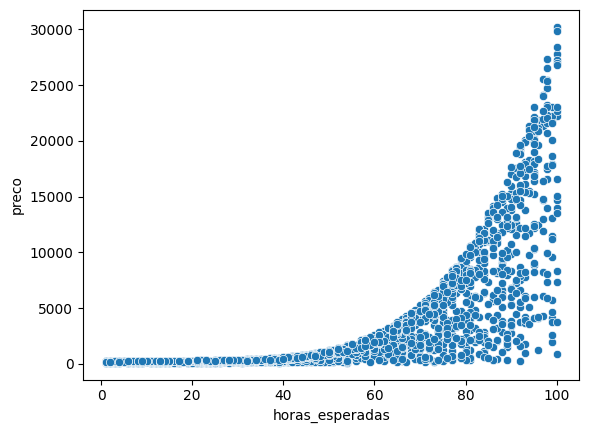

In [ ]:
##desenhando as duas features
import seaborn as sns
sns.scatterplot(x='horas_esperadas', y='preco',data=dados)

<Axes: xlabel='horas_esperadas', ylabel='preco'>

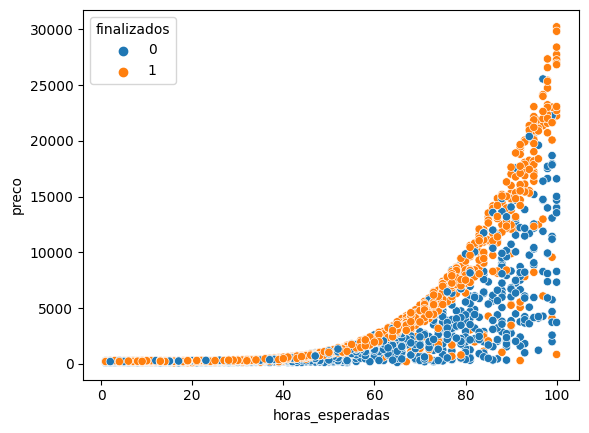

In [ ]:
sns.scatterplot(x='horas_esperadas', y='preco', hue='finalizados', data=dados)

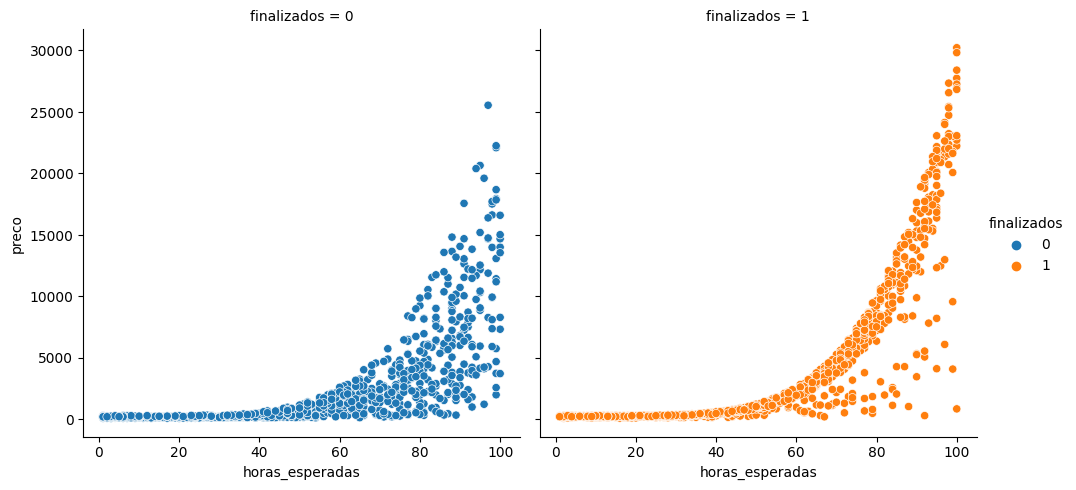

In [ ]:
sns.relplot(x='horas_esperadas', y='preco', hue='finalizados', col='finalizados', data=dados)

In [ ]:
x= dados[['horas_esperadas', 'preco']]
y=dados['finalizados']

In [ ]:
#não está proporcional a relação treino/teste em relação a quem comprou
##manter a mesma proporção

##tornar o experimento replicável -> definir um número inicial para a geração aleatória
##tirando aleatoriedade entre treino e teste:

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED=5

treino_x, teste_x, treino_y, teste_y=train_test_split(x,y,random_state=SEED,test_size=0.25,
                                                                  stratify=y)
print("Treinaremos com %d elementos e testremos com %d elementos" % (len(treino_x),len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x,treino_y)
previsoes=modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)*100
print("A acuracia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testremos com 540 elementos
A acuracia foi 56.11%


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
import numpy as np
previsoes_linha_de_base = np.ones(540)

In [ ]:
acuracia = accuracy_score(teste_y, previsoes_linha_de_base)*100
print("A acuracia do algoritmo de baseline foi %.2f%%" % acuracia)

A acuracia do algoritmo de baseline foi 52.59%


<Axes: xlabel='horas_esperadas', ylabel='preco'>

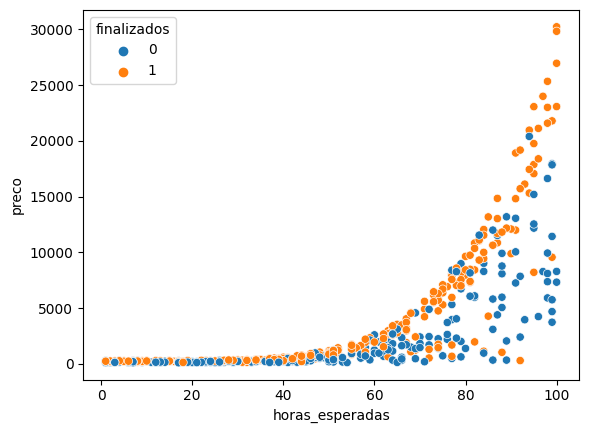

In [ ]:
sns.scatterplot(x='horas_esperadas', y='preco', hue=teste_y, data=teste_x)

In [ ]:
x_min=teste_x.horas_esperadas.min()
x_max=teste_x.horas_esperadas.max()
y_min=teste_x.preco.min()
y_max=teste_x.preco.max()
print(x_min,x_max,y_min,y_max)

1 100 100 30223


In [ ]:
pixel=100
eixo_x = np.arange(x_min, x_max, (x_max - x_min)/pixel)
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/pixel)

In [ ]:
xx, yy = np.meshgrid(eixo_x,eixo_y)
pontos=np.c_[xx.ravel(), yy.ravel()]

In [ ]:
z = modelo.predict(pontos)
z = z.reshape(xx.shape)
z

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

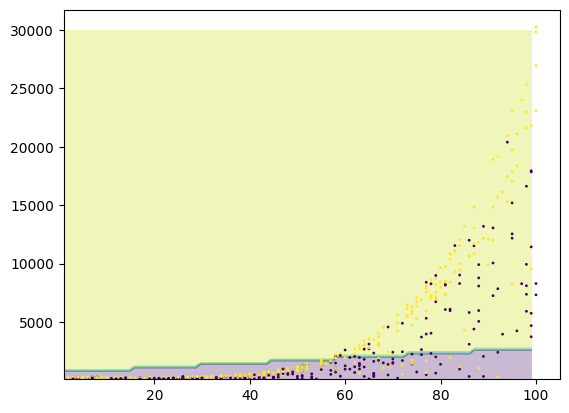

In [ ]:
import matplotlib.pyplot as plt

plt.contourf(xx, yy, z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)

Sequência da aula: 

1.   Utilizar o módulo Support Vector Machine;
2.   Gerar valores randômicos com o módulo SVC;
1.   Utilizar o módulo Standard Scale.







In [ ]:
from sklearn.svm import SVC

SEED=5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.25,
                                                          stratify = y)

print ("Treinamos com %d elementos e testamos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = SVC(gamma='auto')

Treinamos com 1617 elementos e testamos com 540 elementos


In [ ]:

modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)*100
print("A acuracia foi %.2f%%" % acuracia)

A acuracia foi 59.07%


1 100 100 30223


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


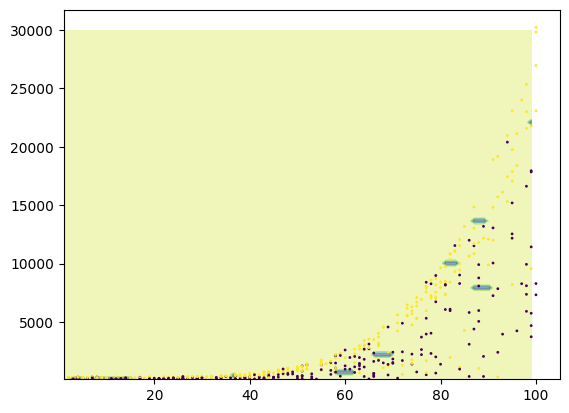

In [ ]:
x_min=teste_x.horas_esperadas.min()
x_max=teste_x.horas_esperadas.max()
y_min=teste_x.preco.min()
y_max=teste_x.preco.max()
print(x_min,x_max,y_min,y_max)

pixel=100
eixo_x = np.arange(x_min, x_max, (x_max - x_min)/pixel)
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/pixel)

xx, yy = np.meshgrid(eixo_x,eixo_y)
pontos=np.c_[xx.ravel(), yy.ravel()]

z = modelo.predict(pontos)
z = z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx, yy, z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)

<Axes: xlabel='horas_esperadas', ylabel='preco'>

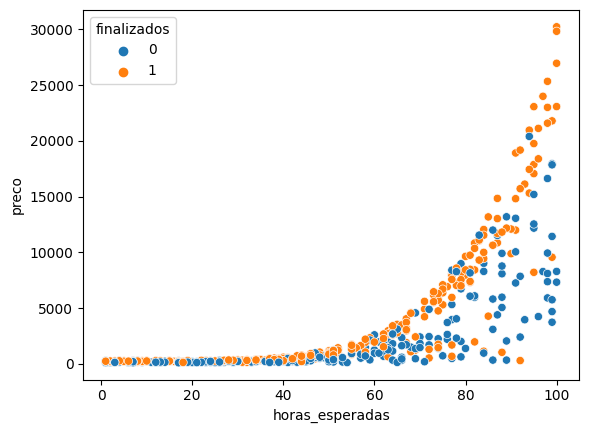

In [ ]:
sns.scatterplot(x='horas_esperadas', y='preco', hue=teste_y, data=teste_x)

In [ ]:
##reescalando os eixos
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

SEED=5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.25,
                                                          stratify = y)

print ("Treinamos com %d elementos e testamos com %d elementos" % (len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC(gamma='auto')
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)*100
print("A acuracia foi %.2f%%" % acuracia)

Treinamos com 1617 elementos e testamos com 540 elementos
A acuracia foi 66.85%


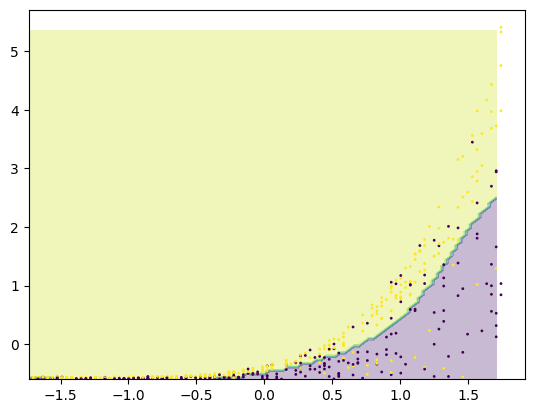

In [ ]:
data_x = teste_x[:, 0]
data_y = teste_x[:, 1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixel=100
eixo_x = np.arange(x_min, x_max, (x_max - x_min)/pixel)
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/pixel)

xx, yy = np.meshgrid(eixo_x,eixo_y)
pontos=np.c_[xx.ravel(), yy.ravel()]

z = modelo.predict(pontos)
z = z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx, yy, z, alpha=0.3)
plt.scatter(data_x, data_y, c = teste_y, s=1)